## 1. Import data and libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set path

path = r'/Users/katiedallarosa/Desktop/04-2024 Instacart Basket Analysis_KDallaRosa'

In [3]:
# Import and identify dataframe

ords_prods_merge = pd.read_pickle(r'/Users/katiedallarosa/Desktop/04-2024 Instacart Basket Analysis_KDallaRosa/02 Data/Prepared Data/ords_prods_grouped.pkl')

<Axes: xlabel='orders_day_of_week'>

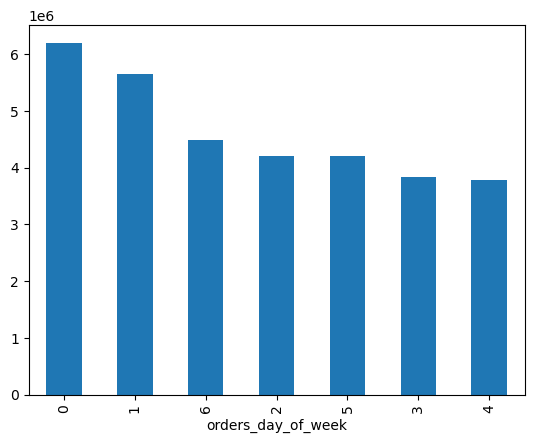

In [5]:
# Create a bar chart

ords_prods_merge['orders_day_of_week'].value_counts().plot.bar()

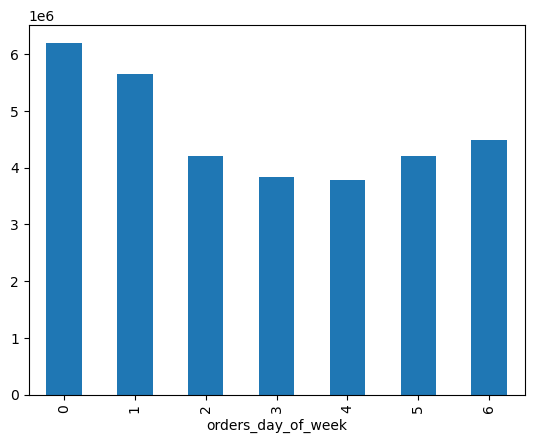

In [8]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().sort_index().plot.bar()

In [9]:
ords_prods_merge['orders_day_of_week'].value_counts()

orders_day_of_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [10]:
ords_prods_merge['orders_day_of_week'].value_counts().sort_index()

orders_day_of_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

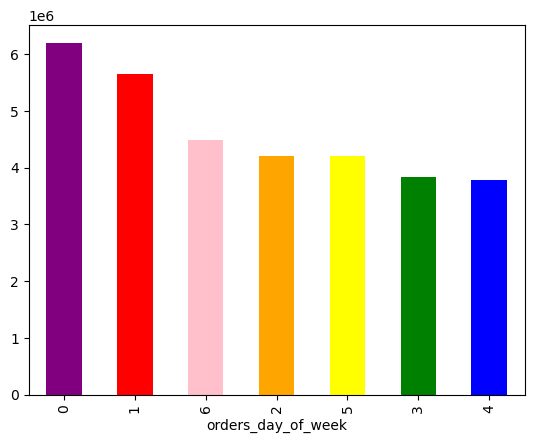

In [13]:
bar = ords_prods_merge['orders_day_of_week'].value_counts().plot.bar(color = ['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

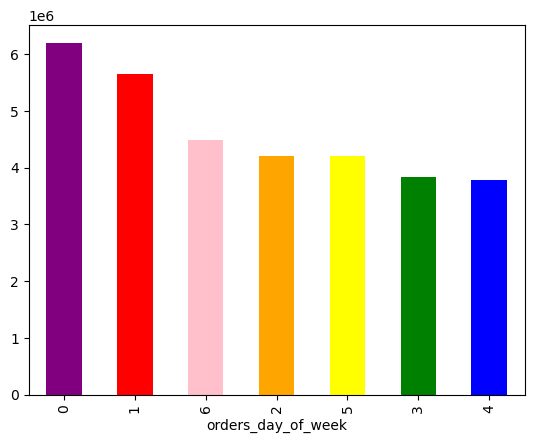

In [14]:
bar.figure

In [15]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

### 3. Histograms

<Axes: ylabel='Frequency'>

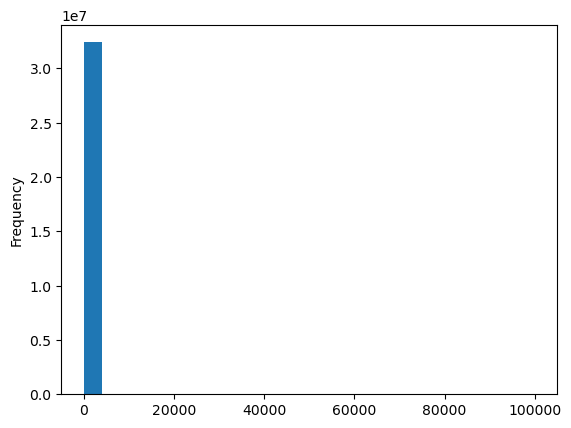

In [17]:
ords_prods_merge['prices'].plot.hist(bins = 25)

In [18]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [19]:
ords_prods_merge['prices'].mean()

11.980225638383468

In [20]:
ords_prods_merge['prices'].median()

7.4

In [21]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

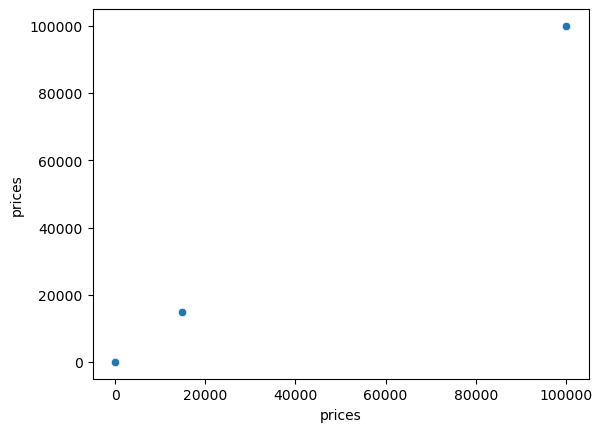

In [22]:
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [23]:
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

product_id                      product_name  aisle_id  \
13100147       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100148       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100149       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100150       21553  Lowfat 2% Milkfat Cottage Cheese       108   
13100151       21553  Lowfat 2% Milkfat Cottage Cheese       108   
...              ...                               ...       ...   
21786876       33664             2 % Reduced Fat  Milk        84   
21786877       33664             2 % Reduced Fat  Milk        84   
21786878       33664             2 % Reduced Fat  Milk        84   
21786879       33664             2 % Reduced Fat  Milk        84   
21786880       33664             2 % Reduced Fat  Milk        84   

          department_id   prices  order_id  customer_id  order_number  \
13100147             16  14900.0    912404           17            12   
13100148             16  14900.0    603376           17            22   
13100149             16  14900.0   3264360          135             2   
13100150             16  14900.0    892534          135             3   
13100151             16  14900.0    229704          342             8   
...                 ...      ...       ...          ...           ...   
21786876             16  99999.0   2249946       204099            29   
21786877             16  99999.0   2363282       204099            31   
21786878             16  99999.0   3181945       204395            13   
21786879             16  99999.0   2486215       205227             7   
21786880             16  99999.0   2232716       205227            10   

          orders_day_of_week  order_hour_of_day  ...     price_range_loc  \
13100147                   2                 14  ...  High-range product   
13100148                   6                 16  ...  High-range product   
13100149                   2                 21  ...  High-range product   
13100150                   0                  8  ...  High-range product   
13100151                   1                 19  ...  High-range product   
...                      ...                ...  ...                 ...   
21786876                   0                  8  ...  High-range product   
21786877                   0                  9  ...  High-range product   
21786878                   3                 15  ...  High-range product   
21786879                   3                 20  ...  High-range product   
21786880                   0                 11  ...  High-range product   

             busiest_day    busiest_days  busiest_period_of_day max_order  \
13100147  Regularly busy  Regularly busy            Most orders        40   
13100148  Regularly busy  Regularly busy            Most orders        40   
13100149  Regularly busy  Regularly busy         Average orders         4   
13100150     Busiest day    Busiest days         Average orders         4   
13100151  Regularly busy    Busiest days         Average orders        16   
...                  ...             ...                    ...       ...   
21786876     Busiest day    Busiest days         Average orders        39   
21786877     Busiest day    Busiest days            Most orders        39   
21786878  Regularly busy    Slowest days            Most orders        15   
21786879  Regularly busy    Slowest days         Average orders        12   
21786880     Busiest day    Busiest days            Most orders        12   

              loyalty_flag mean_prod_price spending_flag  \
13100147  Regular customer      108.648299  High spender   
13100148  Regular customer      108.648299  High spender   
13100149      New customer     1154.792308  High spender   
13100150      New customer     1154.792308  High spender   
13100151  Regular customer      114.426619  High spender   
...                    ...             ...           ...   
21786876  Regular customer     1106.743956  High spender  

In [26]:
# Assign NaNs to items over 100 dollars

ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [27]:
ords_prods_merge['prices'].max()

25.0

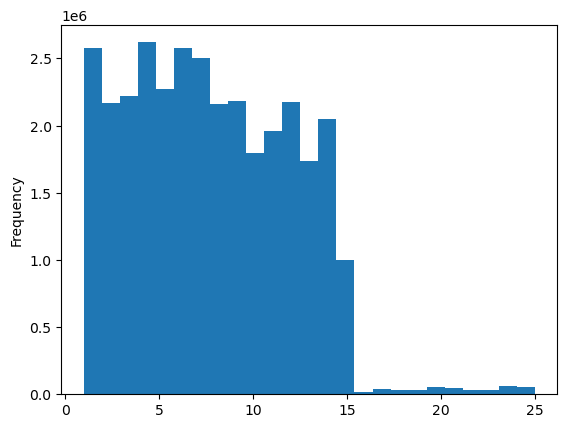

In [29]:
hist = ords_prods_merge['prices'].plot.hist(bins = 25)

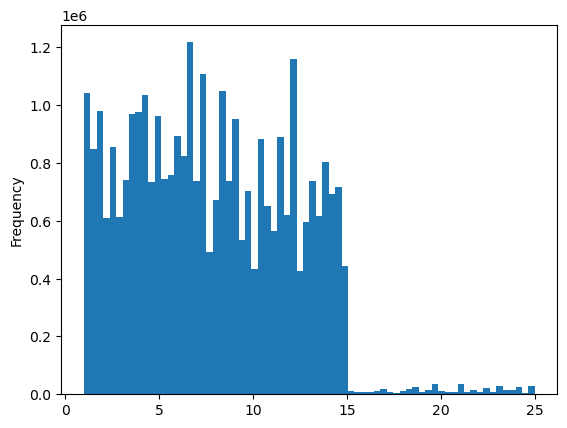

In [31]:
# Increase level of granularity in histogram

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [32]:
# Export histogram

hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [35]:
# Set seed to 4 for random but reproducible pattern

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [36]:
# Where boolean values are stored

dev

array([False,  True, False, ...,  True,  True,  True])

In [37]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [38]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [39]:
len(ords_prods_merge)

32404859

In [40]:
len(big) + len(small)

32404859

In [41]:
# Reduce  samples to necessary columns only

df_2 = small[['orders_day_of_week','prices']]

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


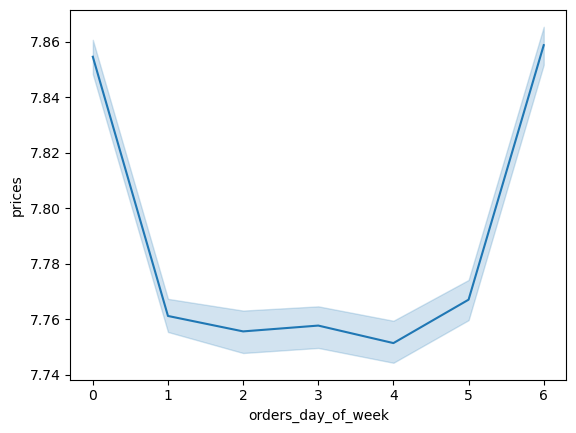

In [43]:
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')